We are going to be doing our final capstone project

    • Develop a machine learning model to predict Telco customer churn (i.e., customers likely to stop using a product or service) and devise strategies to reduce churn rates based on your findings.


road map 
- Data Collection:
- Data Preprocessing:
- Exploratory Data Analysis (EDA):
- Model Development:
- Interpretability and Feature Importance:
- Retention Strategy Development:
- Deployment and Monitoring:

## Importing dependencies

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
# Load the dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
# See the shape - num of columns and rows
data.shape

(7043, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#  We can see hiw our columns look like and their data types
data.columns
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [10]:
# check for null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
# information for categorical columns
data.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [14]:
# Check unique values in each column
data.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
# Check for duplicated columns
data.duplicated().sum()

0

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


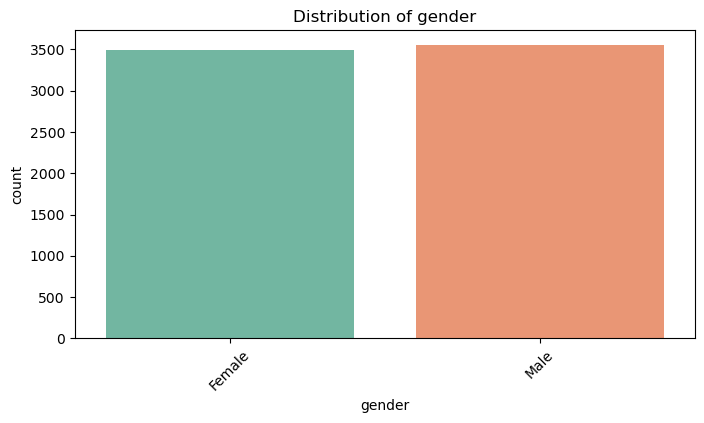

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


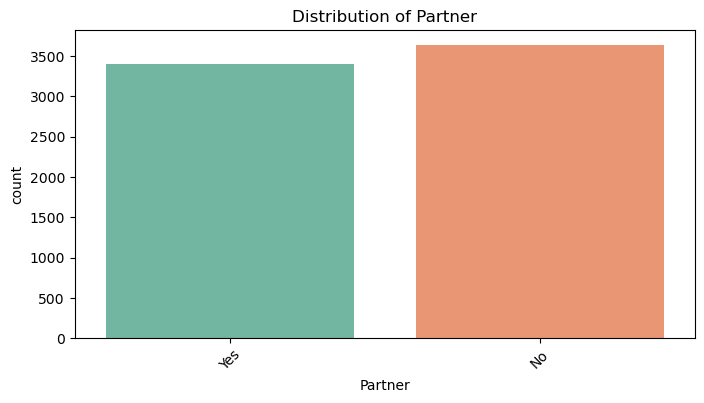

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


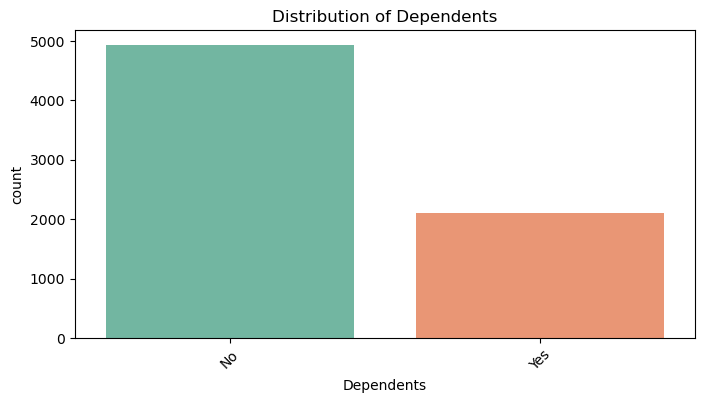

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


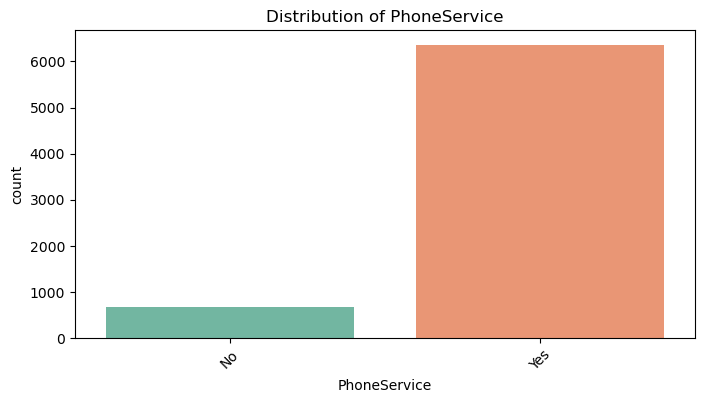

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


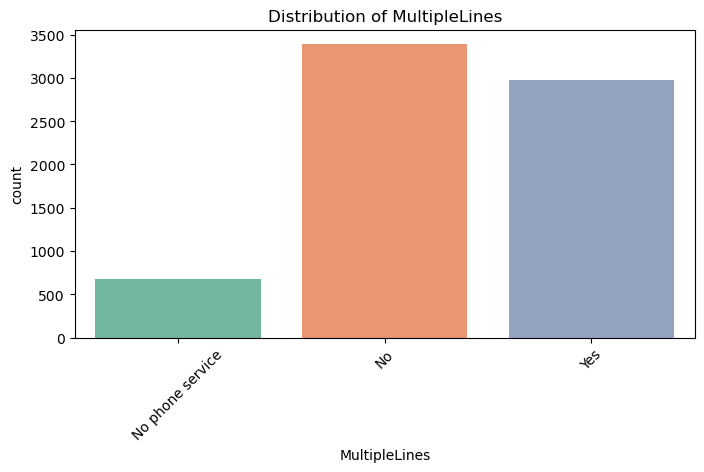

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


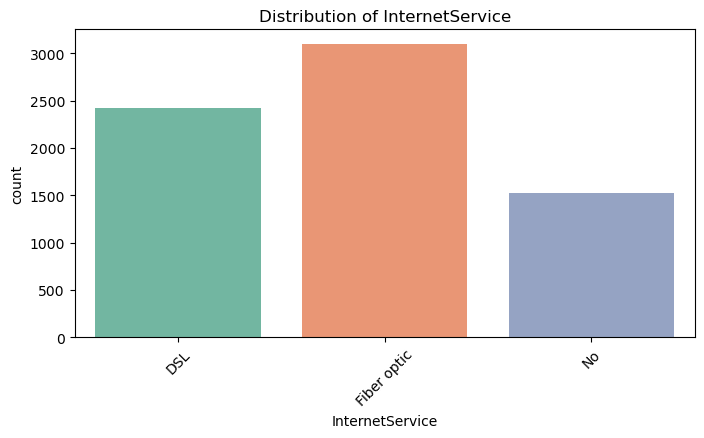

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


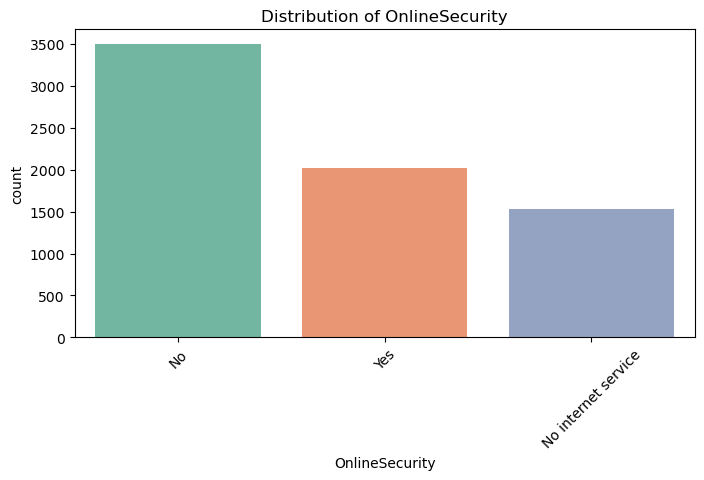

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


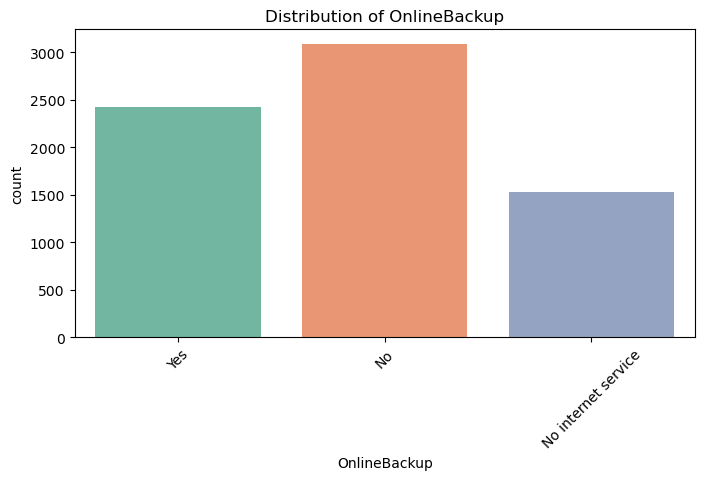

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


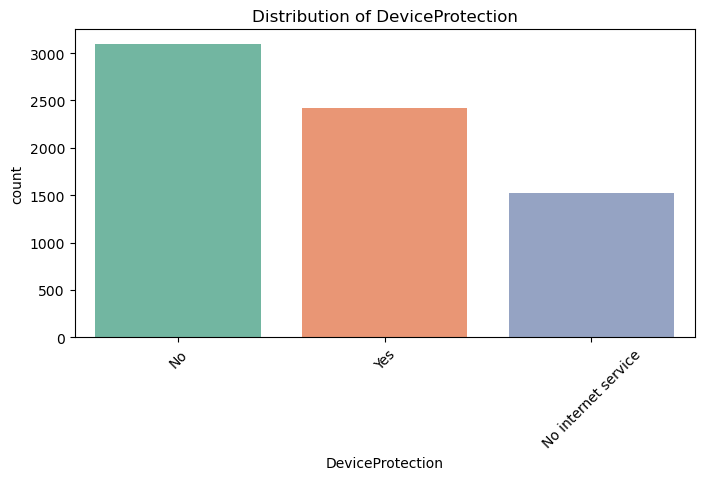

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


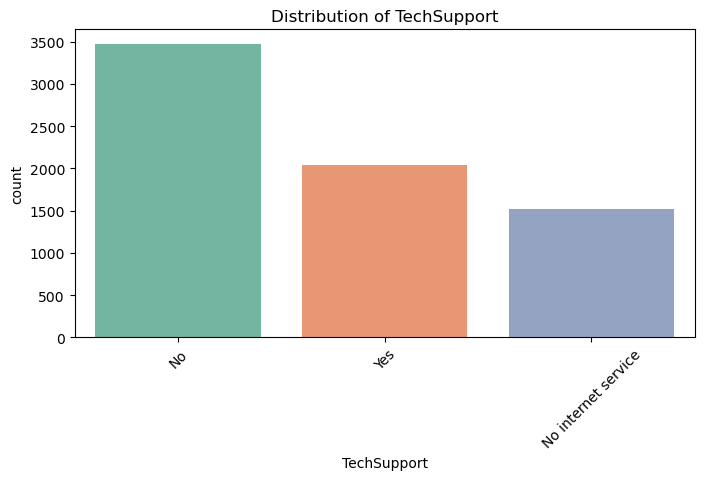

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


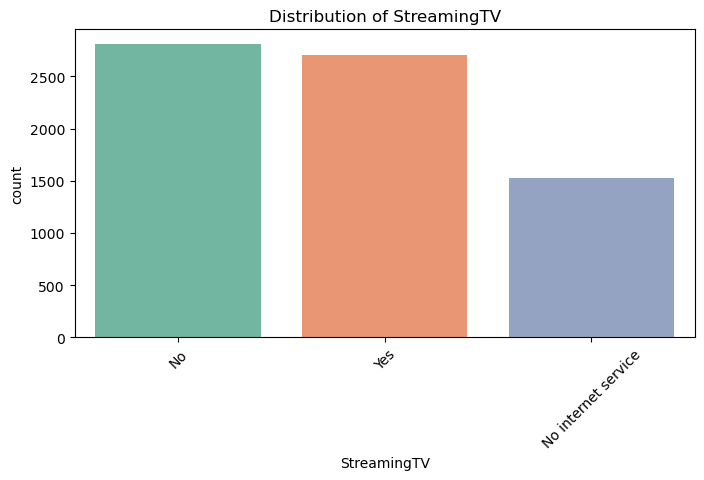

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


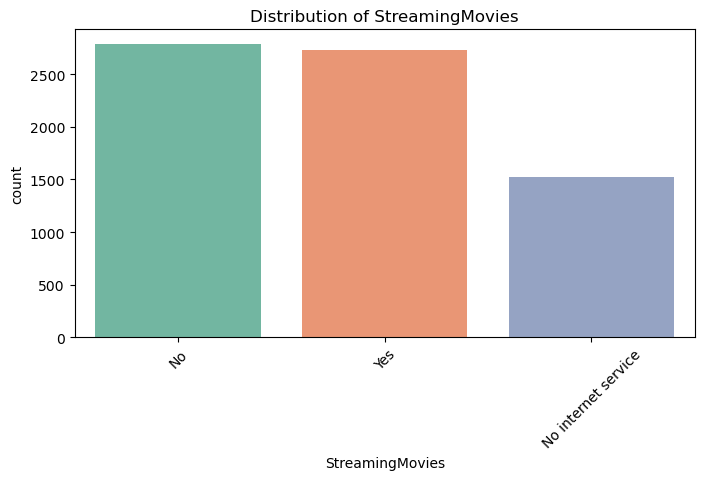

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


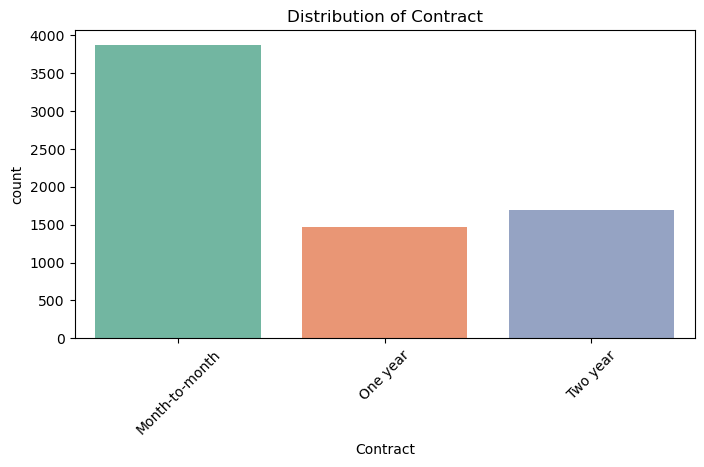

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


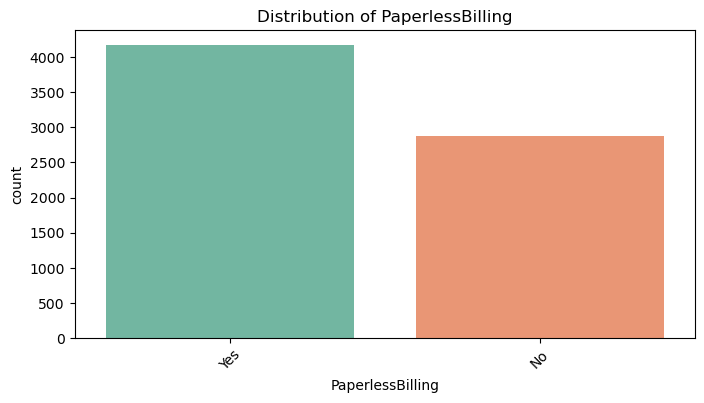

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


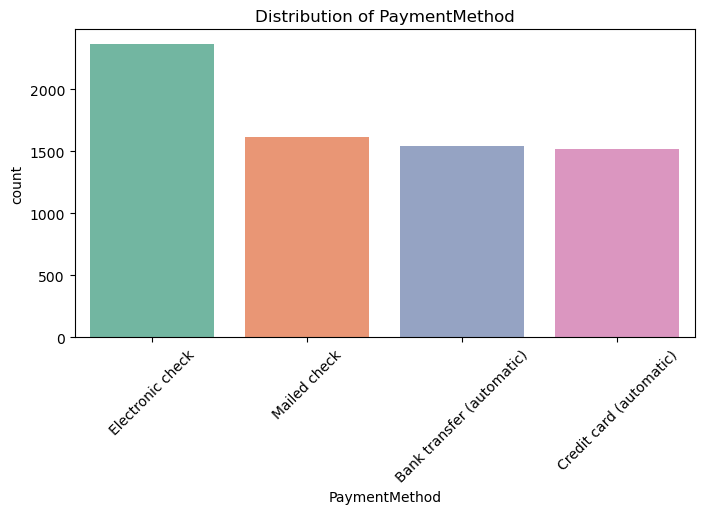

/tmp/ipykernel_8865/2347388476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


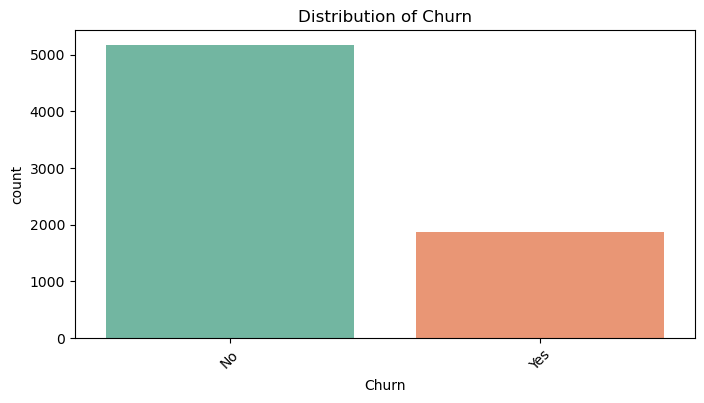

In [16]:


# List of categorical columns to plot
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

# Plot each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


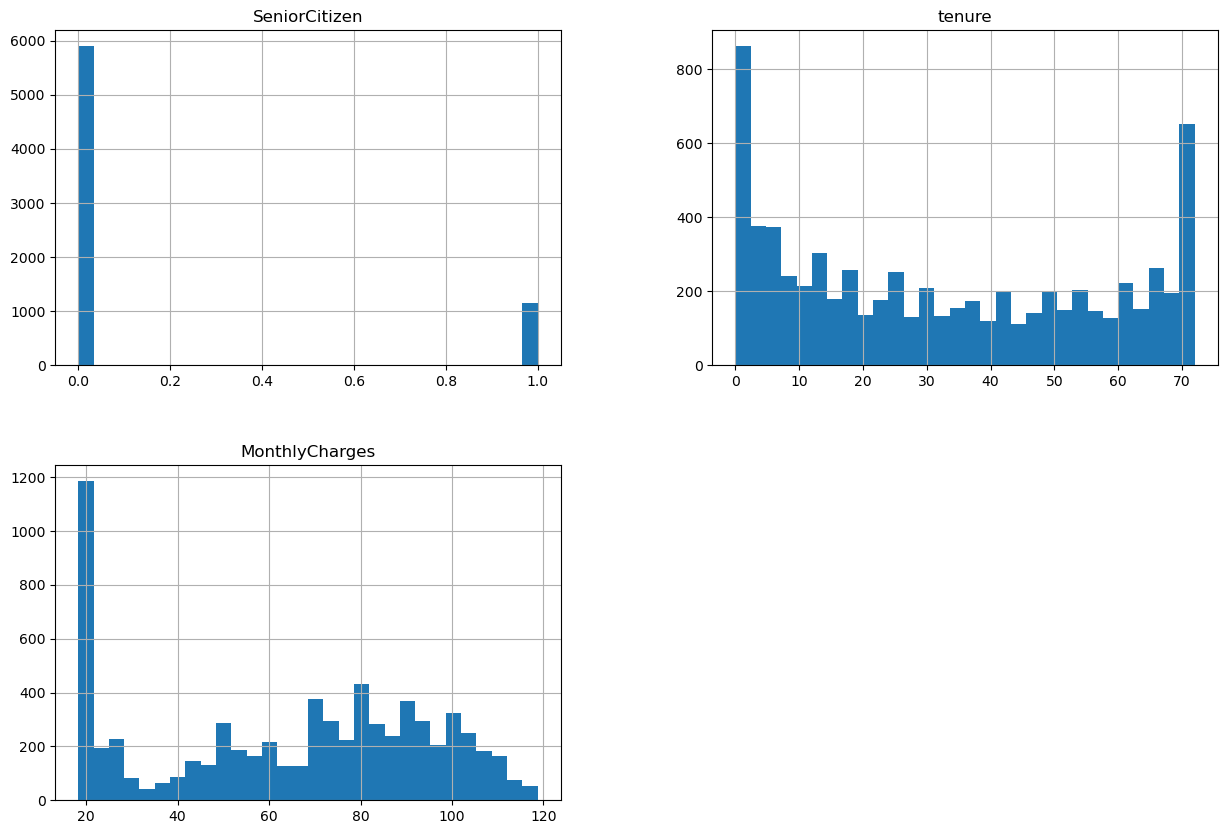

In [17]:
data.hist(bins=30, figsize=(15, 10))
plt.show()


In [18]:
# Encoding or object columns 
# note that we have alot of categorical columns 
#  we do it in two faces ....we will encode the binary columns then non binary

# binary columns
# Label encoding binary columns
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


# None binary columns

# One-Hot Encoding for non-binary categorical columns
data = pd.get_dummies(data, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                 'Contract', 'PaymentMethod'], drop_first=True)


# We can see that one columns totalcharges should be in numeric value
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [19]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False
5,9305-CDSKC,0,0,0,0,8,1,1,99.65,820.50,...,False,False,True,False,True,False,False,False,True,False
6,1452-KIOVK,1,0,0,1,22,1,1,89.10,1949.40,...,False,False,True,False,False,False,False,True,False,False
7,6713-OKOMC,0,0,0,0,10,0,0,29.75,301.90,...,False,False,False,False,False,False,False,False,False,True
8,7892-POOKP,0,0,1,0,28,1,1,104.80,3046.05,...,True,False,True,False,True,False,False,False,True,False
9,6388-TABGU,1,0,0,1,62,1,0,56.15,3487.95,...,False,False,False,False,False,True,False,False,False,False


In [20]:
data.dtypes

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes

In [21]:
# Find columns with 'bool' data type
bool_columns = data.select_dtypes(include=['bool']).columns

# Convert the boolean columns to integers
data[bool_columns] = data[bool_columns].astype(int)

# Verify the changes
print(data.dtypes)

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes

In [22]:
# Save 'customerID' for later use
customer_ids = data['customerID']

# Drop 'customerID' from the training data
data.drop('customerID', axis=1, inplace=True)

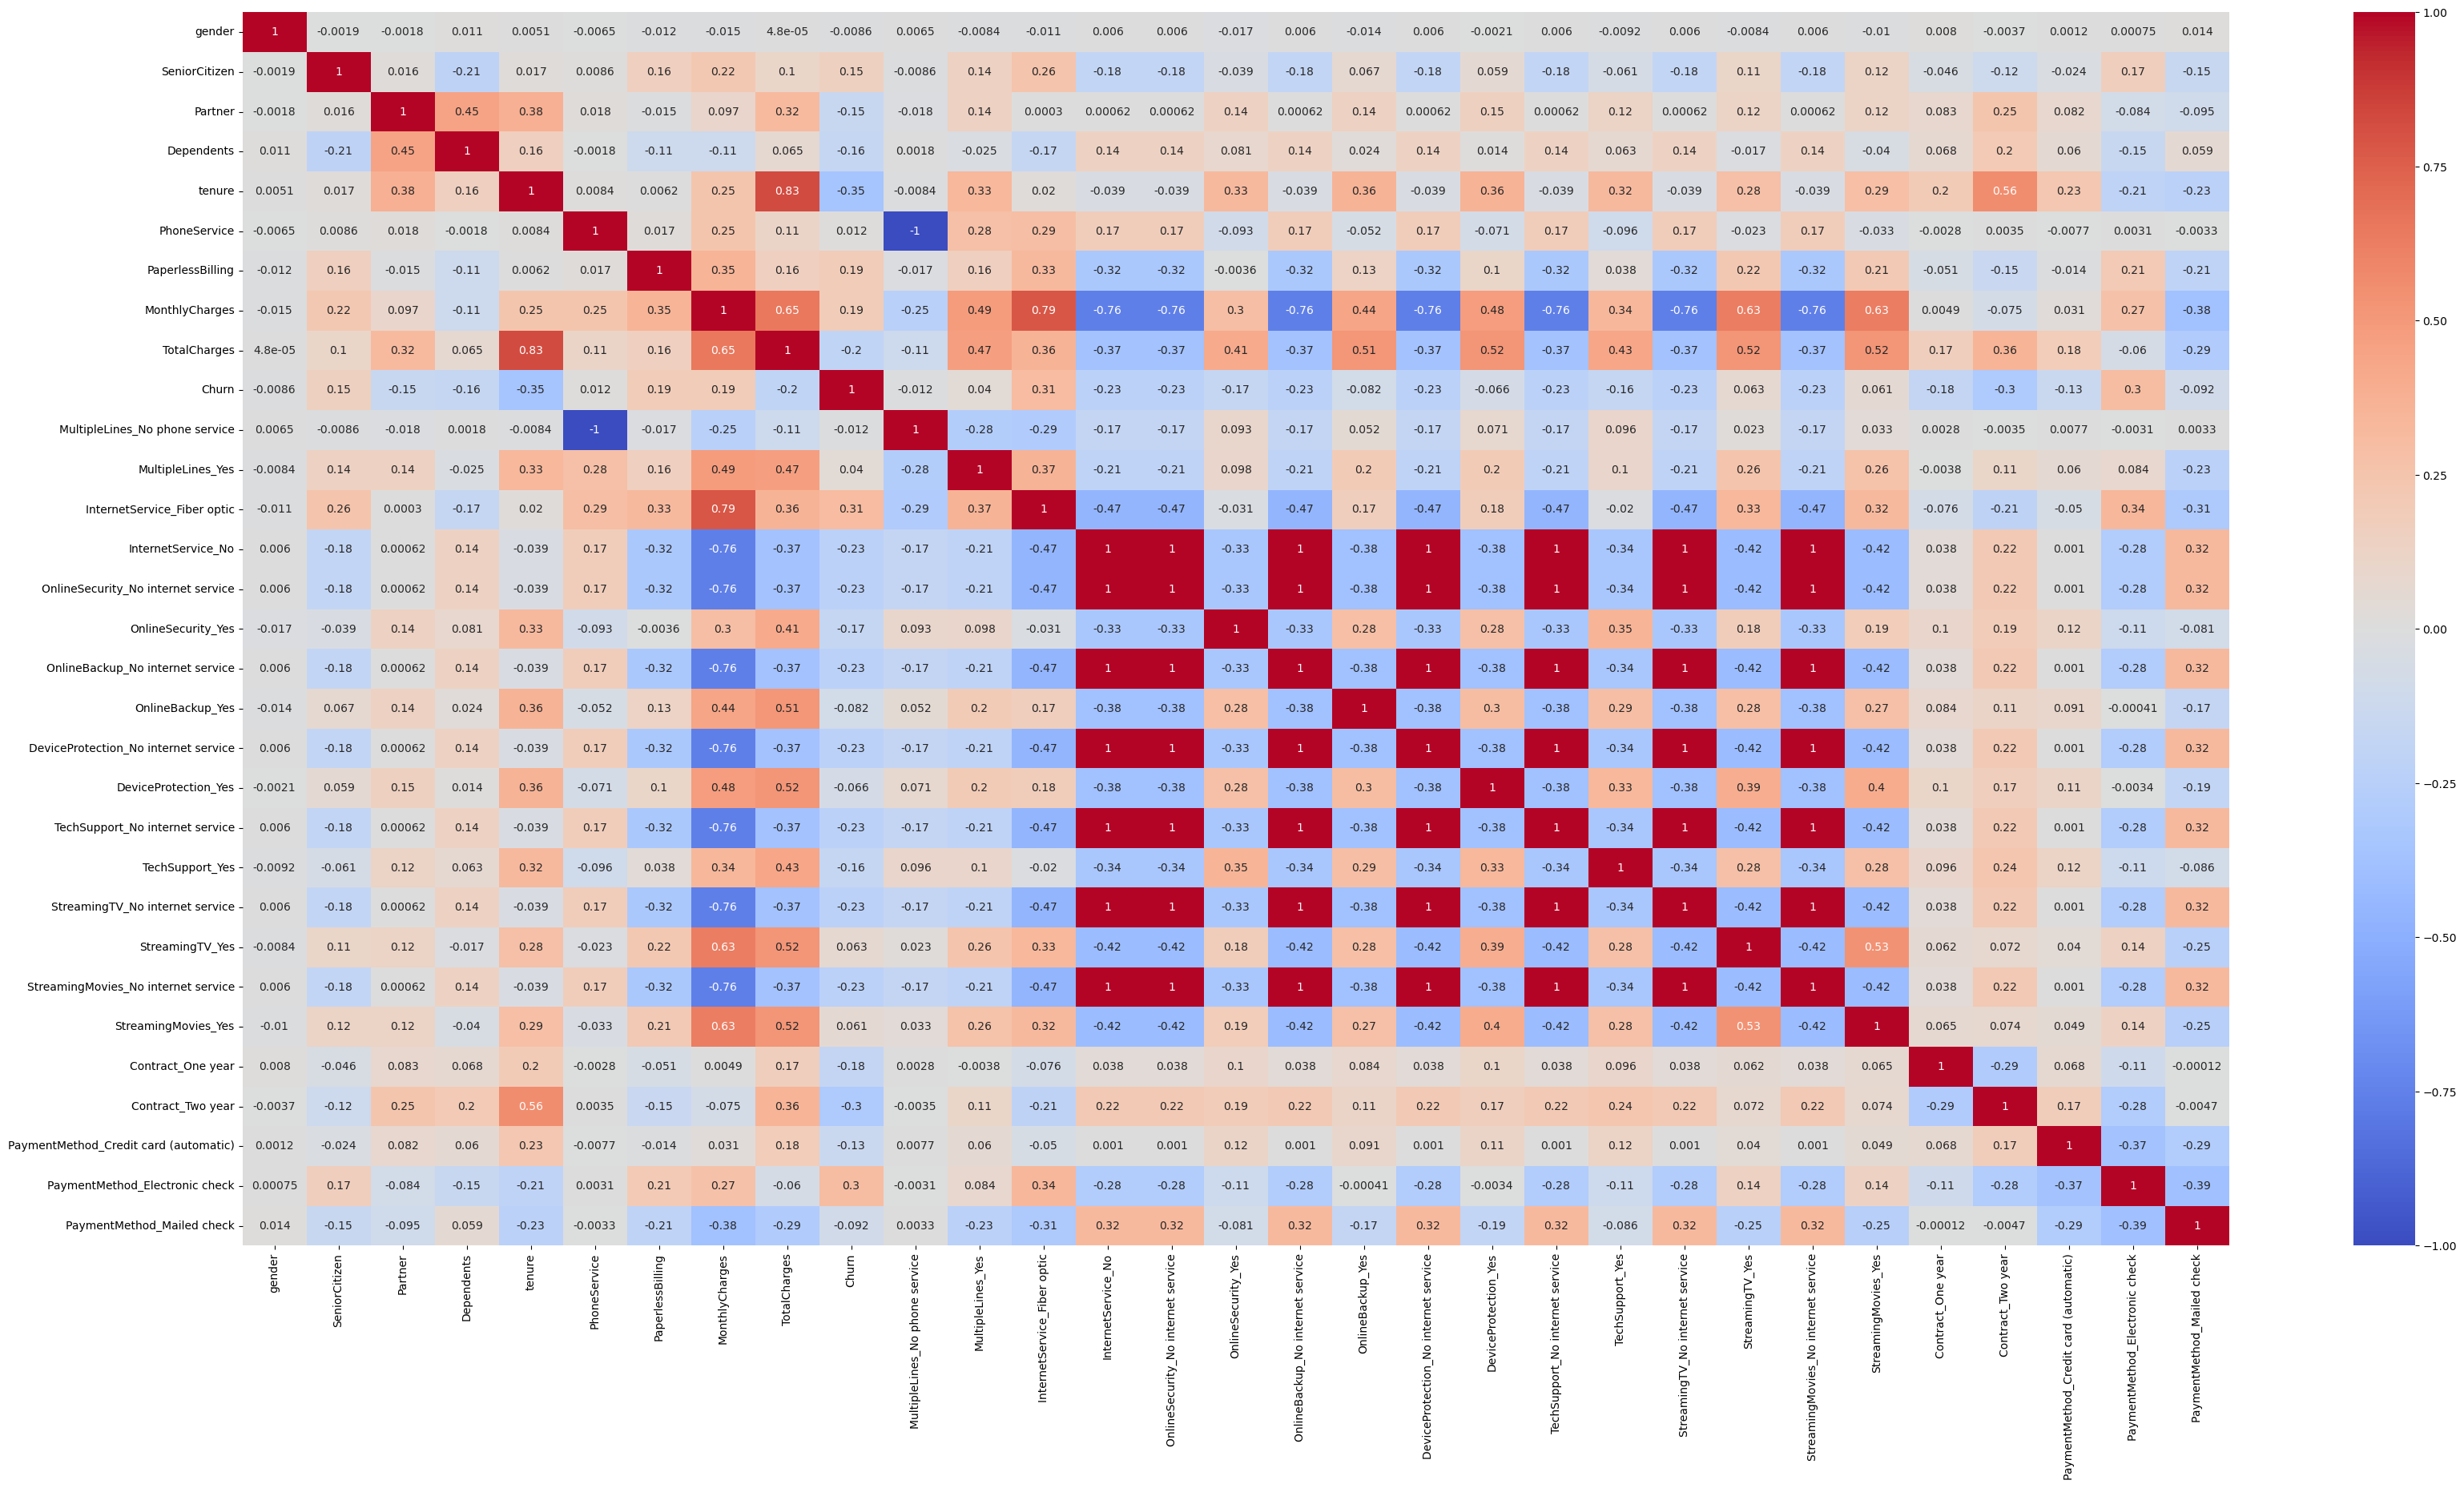

In [23]:
# Generate correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [24]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,...,0.290217,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,0.441561,...,0.453895,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


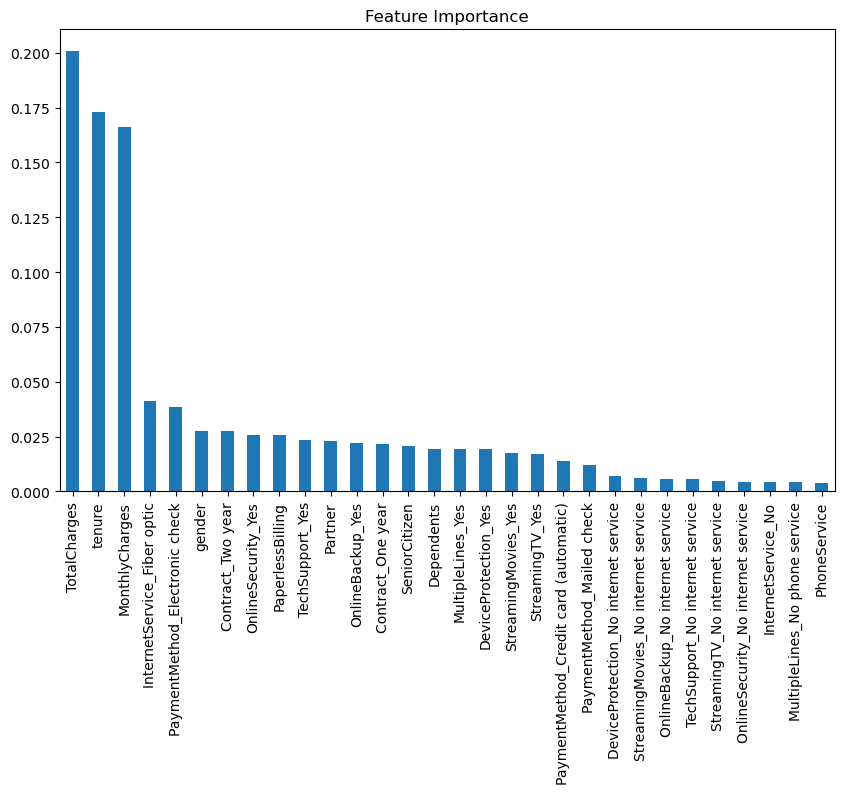

In [25]:
#  this is to help me get Feature Importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define your features (X) and target (y)
X = data.drop(columns=['Churn'])  # Exclude target column 'Churn'
y = data['Churn']

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [26]:
# Select top 10
N = 10  
top_features = feature_importances.head(N).index.tolist()

# Create a new DataFrame with selected features and target variable
X_selected = X[top_features]  # Select top features
y_selected = y  # Keep the target variable

# Display the selected features
print("Selected Features:")
print(X_selected.head())


Selected Features:
   TotalCharges  tenure  MonthlyCharges  InternetService_Fiber optic  \
0         29.85       1           29.85                            0   
1       1889.50      34           56.95                            0   
2        108.15       2           53.85                            0   
3       1840.75      45           42.30                            0   
4        151.65       2           70.70                            1   

   PaymentMethod_Electronic check  gender  Contract_Two year  \
0                               1       0                  0   
1                               0       1                  0   
2                               0       1                  0   
3                               0       1                  0   
4                               1       0                  0   

   OnlineSecurity_Yes  PaperlessBilling  TechSupport_Yes  
0                   0                 1                0  
1                   1                 0      

In [27]:
# Check for missing values in your features
print(X.isnull().sum())


gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                 

In [28]:
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the feature set and transform the data
X_imputed = imputer.fit_transform(X)

# If you want to convert it back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)


In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to the cleaned training data
X_balanced, y_balanced = smote.fit_resample(X_imputed, y_selected)

# Check the new balance of classes
print(f'Balanced class distribution: {Counter(y_balanced)}')


Balanced class distribution: Counter({0: 5174, 1: 5174})


In [30]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)



## Training / Evaluating Model

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd


In [33]:
# Resample data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y_selected)

# Train the Random Forest model on the resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=42)

In [34]:
import pickle

# Save the trained model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully.")


Model saved successfully.


In [35]:
def evaluate_models_with_cv(X, y, cv=5):
    # Create a list of models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Support Vector Classifier': SVC(probability=True)
    }

    # Store results
    results = {}

    # Handle SMOTE and train-test split
    for name, model in models.items():
        # Create a pipeline that handles missing values
        pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('classifier', model)
        ])

        # Use cross-validation with SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Evaluate the model using cross-validation
        scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=cv, scoring='accuracy')

        results[name] = {
            'mean_accuracy': scores.mean(),
            'std_accuracy': scores.std()
        }

    return results


In [36]:
# Evaluate the models using cross-validation
model_results_cv = evaluate_models_with_cv(X_balanced, y_balanced)

# Display the results
for model_name, metrics in model_results_cv.items():
    print(f"{model_name}:")
    print(f"Mean Accuracy: {metrics['mean_accuracy']:.2f} ± {metrics['std_accuracy']:.2f}")
    print("=" * 50)


/home/george/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/george/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Logistic Regression:
Mean Accuracy: 0.77 ± 0.01
Decision Tree:
Mean Accuracy: 0.80 ± 0.09
Random Forest:
Mean Accuracy: 0.84 ± 0.11
Gradient Boosting:
Mean Accuracy: 0.84 ± 0.10
Support Vector Classifier:
Mean Accuracy: 0.66 ± 0.01


### Model Interpretability with SHAP

In [38]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [39]:
import shap

# Create the SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_resampled)

# Summary plot
shap.summary_plot(shap_values[1], X_resampled)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.